In [1]:
###Done by Kevin Sofronas
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

#Read in emailSpamCollection
df = pd.read_csv('SpamCollection', sep='\t')
#Dataframe does not have colum labels - add them
df.columns = ['Label','email']

In [2]:
#display first 5 rows of data
df.head()

,Label,email
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
#Pre-process and clean up dataset by removing trailing white spaces, converting to lower case etc.
#it also puts each email text into a list of words that is stored in the email column of the dataframe
#this is the code you'll need when you read in the test data
email_data_clean = df.copy()
email_data_clean['email'] = email_data_clean['email'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
email_data_clean['email'] = email_data_clean['email'].str.lower()
email_data_clean['email'] = email_data_clean['email'].str.split()
le = preprocessing.LabelEncoder()

#change label from ham/spam to 0/1
email_data_clean['Label'] = le.fit_transform(email_data_clean['Label'])

#View new data
email_data_clean.head()

,Label,email
0,0,"[ok, lar, joking, wif, u, oni]"
1,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,0,"[u, dun, say, so, early, hor, u, c, already, t..."
3,0,"[nah, i, don, t, think, he, goes, to, usf, he,..."
4,1,"[freemsg, hey, there, darling, it, s, been, 3,..."


In [4]:
#get nparray of all words in email
np_sms = email_data_clean.iloc[:,1].values
#store them in vocabulary 
vocabulary = list(set(np_sms.sum()))
vocabulary
#these are all the words in the dataset
#8751 words 
len(vocabulary)

8751

In [5]:
#create new dataframe with each word as a feature and the # of times the word occurs as value
df_voc = pd.DataFrame([
    [row.count(word) for word in vocabulary]
    for row in email_data_clean.iloc[:,1].values], columns=vocabulary)
 
#use this as your training data
df_voc_train = df_voc.copy()

#Add the label back to the dataframe
#Use this dataframe if you need the label to create charts
df_voc['Label'] = email_data_clean.loc[:,'Label']

#use the df_voc_train to train your classifiers
df_voc_train.head()

,fwiw,terrorist,1mega,champ,from,begging,txting,528,studdying,inever,...,ride,squid,moves,eating,regalportfolio,motherfucker,jeremiah,clever,prescription,bao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
spamcounts = email_data_clean["Label"].value_counts()
spamcounts[1]

747

In [7]:
spamcounts

0    4824
1     747
Name: Label, dtype: int64

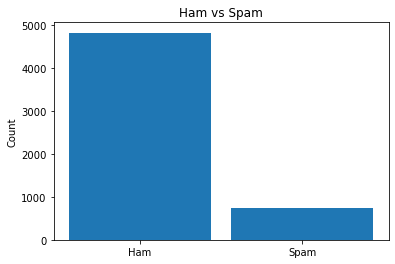

In [8]:
#spamcounts = email_data_clean["Label"].value_counts()
plt.bar(x=[0,0.4], height = spamcounts, width=0.35)
plt.xticks([0,0.4], ("Ham", "Spam"))
plt.ylabel("Count")
plt.title("Ham vs Spam")
plt.show()

In [9]:
df_voc.sum().sort_values(ascending = False)[0:9]

i      3021
to     2253
you    2245
a      1450
the    1339
u      1207
and     980
in      902
is      897
dtype: int64

In [10]:
email_data_spam = email_data_clean[email_data_clean["Label"]==1]
email_data_ham = email_data_clean[email_data_clean["Label"]==0]

In [11]:
#get nparray of all words in email
np_sms_spam = email_data_spam.iloc[:,1].values
np_sms_ham = email_data_ham.iloc[:,1].values
#store them in vocabulary 
vocabulary_spam = list(set(np_sms_spam.sum()))
vocabulary_ham = list(set(np_sms_ham.sum()))

#create new dataframe with each word as a feature and the # of times the word occurs as value
df_voc_spam = pd.DataFrame([
    [row.count(word) for word in vocabulary_spam]
    for row in email_data_spam.iloc[:,1].values], columns=vocabulary_spam)

df_voc_ham = pd.DataFrame([
    [row.count(word) for word in vocabulary_ham]
    for row in email_data_ham.iloc[:,1].values], columns=vocabulary_ham)

#use this as your training data
df_voc_spam_train = df_voc_spam.copy()
df_voc_ham_train = df_voc_ham.copy()

#Add the label back to the dataframe
#Use this dataframe if you need the label to create charts
df_voc_spam['Label'] = email_data_spam.loc[:,'Label']
df_voc_ham['Label'] = email_data_ham.loc[:,'Label']

#use the df_voc_train to train your classifiers
df_voc_spam.head()

,09050002311,84128,cops,std,09050001295,sae,immediately,or2optout,god,09066358361,...,08704439680ts,rooms,2exit,regalportfolio,number,cm,link,pobox12n146tf150p,sexual,Label
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [12]:
#most spammed words
df_voc_spam.sum().sort_values(ascending = False)[0:9]

to      691.0
a       380.0
call    355.0
you     297.0
your    264.0
free    224.0
2       207.0
the     206.0
for     204.0
dtype: float64

In [13]:
#most hammed words
df_voc_ham.sum().sort_values(ascending = False)[0:9]

i      2960.0
you    1948.0
to     1562.0
the    1133.0
a      1070.0
u      1033.0
and     858.0
in      822.0
me      777.0
dtype: float64

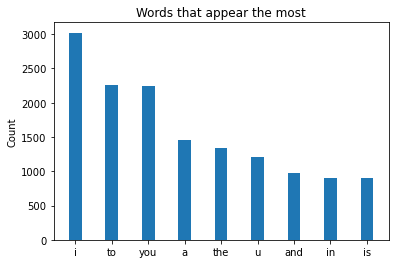

In [14]:
plt.bar(x=[i for i, _ in enumerate(df_voc.sum().sort_values(ascending=False)[0:9])], height = df_voc.sum().sort_values(ascending=False)[0:9], width=0.35)
plt.xticks([i for i, _ in enumerate(df_voc.sum().sort_values(ascending=False)[0:9])], df_voc.sum().sort_values(ascending=False)[0:9].index)
plt.ylabel("Count")
plt.title("Words that appear the most")
plt.show()

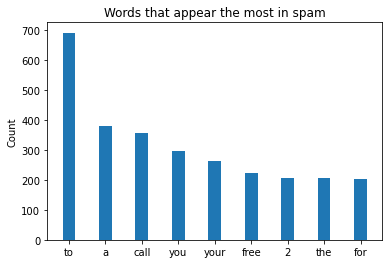

In [15]:
plt.bar(x=[i for i, _ in enumerate(df_voc_spam.sum().sort_values(ascending=False)[0:9])], height = df_voc_spam.sum().sort_values(ascending=False)[0:9], width=0.35)
plt.xticks([i for i, _ in enumerate(df_voc_spam.sum().sort_values(ascending=False)[0:9])], df_voc_spam.sum().sort_values(ascending=False)[0:9].index)
plt.ylabel("Count")
plt.title("Words that appear the most in spam")
plt.show()

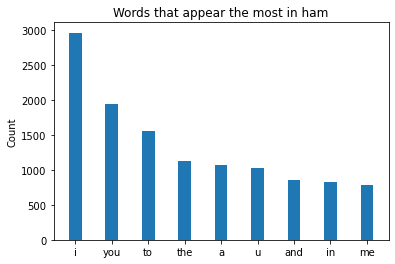

In [16]:
plt.bar(x=[i for i, _ in enumerate(df_voc_ham.sum().sort_values(ascending=False)[0:9])], height = df_voc_ham.sum().sort_values(ascending=False)[0:9], width=0.35)
plt.xticks([i for i, _ in enumerate(df_voc_ham.sum().sort_values(ascending=False)[0:9])], df_voc_ham.sum().sort_values(ascending=False)[0:9].index)
plt.ylabel("Count")
plt.title("Words that appear the most in ham")
plt.show()

In [72]:
# df_voc_train
# email_data_clean["Label"]
bernoulli = BernoulliNB()
bernoulli.fit(df_voc_train, email_data_clean["Label"])
bern_pred = cv_pred = cross_val_predict(bernoulli, df_voc_train, email_data_clean['Label'], cv=5)
bern_score = cross_val_score(bernoulli,df_voc_train, email_data_clean['Label'], cv=5)
bern_avg = np.mean(bern_score)

In [42]:
bern_avg

0.9809720556150422

In [43]:
ccr = accuracy_score(bern_pred,email_data_clean['Label'])
precision = precision_score(bern_pred,email_data_clean['Label'])
recall = recall_score(bern_pred,email_data_clean['Label'])
print("ccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

ccr = 0.9809728953509245 
precision = 0.8755020080321285 
recall = 0.9805097451274363


In [73]:
multinomial = MultinomialNB()
multinomial.fit(df_voc_train, email_data_clean["Label"])
mult_pred = cv_pred = cross_val_predict(multinomial, df_voc_train, email_data_clean['Label'], cv=5)
mult_score = cross_val_score(multinomial,df_voc_train, email_data_clean['Label'], cv=5)
mult_avg = np.mean(mult_score)
mult_avg

0.9541188118811881

In [45]:
ccr = accuracy_score(mult_pred,email_data_clean['Label'])
precision = precision_score(mult_pred,email_data_clean['Label'])
recall = recall_score(mult_pred,email_data_clean['Label'])
print("ccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

ccr = 0.982049901274457 
precision = 0.9477911646586346 
recall = 0.9206762028608583


In [74]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(df_voc_train, email_data_clean["Label"])
dt_pred = cv_pred = cross_val_predict(decisionTree, df_voc_train, email_data_clean['Label'], cv=5)
dt_score = cross_val_score(decisionTree,df_voc_train, email_data_clean['Label'], cv=5)
dt_avg = np.mean(dt_score)
dt_avg

0.9002574257425742

In [47]:
ccr = accuracy_score(dt_pred,email_data_clean['Label'])
precision = precision_score(dt_pred,email_data_clean['Label'])
recall = recall_score(dt_pred,email_data_clean['Label'])
print("ccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

ccr = 0.9711003410518758 
precision = 0.8755020080321285 
recall = 0.9058171745152355


In [75]:
perceptron = Perceptron()
perceptron.fit(df_voc_train, email_data_clean["Label"])
ptron_pred = cv_pred = cross_val_predict(perceptron, df_voc_train, email_data_clean['Label'], cv=5)
ptron_score = cross_val_score(perceptron,df_voc_train, email_data_clean['Label'], cv=5)
ptron_avg = np.mean(ptron_score)
ptron_avg

0.9161386138613862

In [49]:
ccr = accuracy_score(ptron_pred,email_data_clean['Label'])
precision = precision_score(ptron_pred,email_data_clean['Label'])
recall = recall_score(ptron_pred,email_data_clean['Label'])
print("ccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

ccr = 0.9849219170705439 
precision = 0.9036144578313253 
recall = 0.982532751091703


In [76]:
randomForest = RandomForestClassifier()
randomForest.fit(df_voc_train, email_data_clean["Label"])
rf_pred = cv_pred = cross_val_predict(randomForest, df_voc_train, email_data_clean['Label'], cv=5)
rf_score = cross_val_score(randomForest,df_voc_train, email_data_clean['Label'], cv=5)
rf_avg = np.mean(rf_score)
rf_avg

0.9321188118811881

In [51]:
ccr = accuracy_score(rf_pred,email_data_clean['Label'])
precision = precision_score(rf_pred,email_data_clean['Label'])
recall = recall_score(rf_pred,email_data_clean['Label'])
print("ccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

ccr = 0.9746903607969843 
precision = 0.8152610441767069 
recall = 0.9950980392156863


In [23]:
###It seems like the perceptron did the best.

In [26]:
sample_10 = df_voc.sample(frac=0.1, replace=True, random_state=1)
sample_10_train = sample_10.drop('Label', axis=1)
sample_10

,fwiw,terrorist,1mega,champ,from,begging,txting,528,studdying,inever,...,squid,moves,eating,regalportfolio,motherfucker,jeremiah,clever,prescription,bao,Label
5157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# df_voc_train
# email_data_clean["Label"]
bernoulli = BernoulliNB()
bernoulli.fit(df_voc_train, email_data_clean["Label"])
bern_pred = cv_pred = cross_val_predict(bernoulli, sample_10_train, sample_10['Label'], cv=5)
bern_score = cross_val_score(bernoulli,sample_10_train, sample_10['Label'], cv=5)
bern_avg = np.mean(bern_score)\

ccr = accuracy_score(bern_pred,sample_10['Label'])
precision = precision_score(bern_pred,sample_10['Label'])
recall = recall_score(bern_pred,sample_10['Label'])
print("Bernoulli:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

multinomial = MultinomialNB()
multinomial.fit(df_voc_train, email_data_clean["Label"])
mult_pred = cv_pred = cross_val_predict(multinomial, sample_10_train, sample_10['Label'], cv=5)
mult_score = cross_val_score(multinomial,sample_10_train, sample_10['Label'], cv=5)
mult_avg = np.mean(mult_score)

ccr = accuracy_score(mult_pred,sample_10['Label'])
precision = precision_score(mult_pred,sample_10['Label'])
recall = recall_score(mult_pred,sample_10['Label'])
print("\n\nMultinomial:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

decisionTree = DecisionTreeClassifier()
decisionTree.fit(df_voc_train, email_data_clean["Label"])
dt_pred = cv_pred = cross_val_predict(decisionTree, sample_10_train, sample_10['Label'], cv=5)
dt_score = cross_val_score(decisionTree,sample_10_train, sample_10['Label'], cv=5)
dt_avg = np.mean(dt_score)

ccr = accuracy_score(dt_pred,sample_10['Label'])
precision = precision_score(dt_pred,sample_10['Label'])
recall = recall_score(dt_pred,sample_10['Label'])
print("\n\nDecision Tree:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

perceptron = Perceptron()
perceptron.fit(df_voc_train, email_data_clean["Label"])
ptron_pred = cv_pred = cross_val_predict(perceptron, sample_10_train, sample_10['Label'], cv=5)
ptron_score = cross_val_score(perceptron,sample_10_train, sample_10['Label'], cv=5)
ptron_avg = np.mean(ptron_score)

ccr = accuracy_score(ptron_pred,sample_10['Label'])
precision = precision_score(ptron_pred,sample_10['Label'])
recall = recall_score(ptron_pred,sample_10['Label'])
print("\n\nPerceptron:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

randomForest = RandomForestClassifier()
randomForest.fit(df_voc_train, email_data_clean["Label"])
rf_pred = cv_pred = cross_val_predict(randomForest, sample_10_train, sample_10['Label'], cv=5)
rf_score = cross_val_score(randomForest,sample_10_train, sample_10['Label'], cv=5)
rf_avg = np.mean(rf_score)

ccr = accuracy_score(rf_pred,sample_10['Label'])
precision = precision_score(rf_pred,sample_10['Label'])
recall = recall_score(rf_pred,sample_10['Label'])
print("\n\nRandom Forest:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

# print(bern_avg, mult_avg, dt_avg, ptron_avg, rf_avg)

Bernoulli:
ccr = 0.8779174147217235 
precision = 0.0 
recall = 0.0


Multinomial:
ccr = 0.947935368043088 
precision = 0.5882352941176471 
recall = 0.975609756097561


Decision Tree:
ccr = 0.9551166965888689 
precision = 0.8088235294117647 
recall = 0.8208955223880597


Perceptron:
ccr = 0.9640933572710951 
precision = 0.7794117647058824 
recall = 0.9137931034482759


Random Forest:
ccr = 0.9281867145421903 
precision = 0.4117647058823529 
recall = 1.0


In [55]:
sample_50 = df_voc.sample(frac=0.5, replace=True,
random_state=1)
sample_50_train = sample_50.drop('Label', axis=1)

In [62]:
# df_voc_train
# email_data_clean["Label"]
bernoulli = BernoulliNB()
bernoulli.fit(df_voc_train, email_data_clean["Label"])
bern_pred = cv_pred = cross_val_predict(bernoulli, sample_50_train, sample_50['Label'], cv=5)
bern_score = cross_val_score(bernoulli,sample_50_train, sample_50['Label'], cv=5)
bern_avg = np.mean(bern_score)\

ccr = accuracy_score(bern_pred,sample_50['Label'])
precision = precision_score(bern_pred,sample_50['Label'])
recall = recall_score(bern_pred,sample_50['Label'])
print("Bernoulli:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

multinomial = MultinomialNB()
multinomial.fit(df_voc_train, email_data_clean["Label"])
mult_pred = cv_pred = cross_val_predict(multinomial, sample_50_train, sample_50['Label'], cv=5)
mult_score = cross_val_score(multinomial,sample_50_train, sample_50['Label'], cv=5)
mult_avg = np.mean(mult_score)

ccr = accuracy_score(mult_pred,sample_50['Label'])
precision = precision_score(mult_pred,sample_50['Label'])
recall = recall_score(mult_pred,sample_50['Label'])
print("\n\nMultinomial:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

decisionTree = DecisionTreeClassifier()
decisionTree.fit(df_voc_train, email_data_clean["Label"])
dt_pred = cv_pred = cross_val_predict(decisionTree, sample_50_train, sample_50['Label'], cv=5)
dt_score = cross_val_score(decisionTree,sample_50_train, sample_50['Label'], cv=5)
dt_avg = np.mean(dt_score)

ccr = accuracy_score(dt_pred,sample_50['Label'])
precision = precision_score(dt_pred,sample_50['Label'])
recall = recall_score(dt_pred,sample_50['Label'])
print("\n\nDecision Tree:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

perceptron = Perceptron()
perceptron.fit(df_voc_train, email_data_clean["Label"])
ptron_pred = cv_pred = cross_val_predict(perceptron, sample_50_train, sample_50['Label'], cv=5)
ptron_score = cross_val_score(perceptron,sample_50_train, sample_50['Label'], cv=5)
ptron_avg = np.mean(ptron_score)

ccr = accuracy_score(ptron_pred,sample_50['Label'])
precision = precision_score(ptron_pred,sample_50['Label'])
recall = recall_score(ptron_pred,sample_50['Label'])
print("\n\nPerceptron:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

randomForest = RandomForestClassifier()
randomForest.fit(df_voc_train, email_data_clean["Label"])
rf_pred = cv_pred = cross_val_predict(randomForest, sample_50_train, sample_50['Label'], cv=5)
rf_score = cross_val_score(randomForest,sample_50_train, sample_50['Label'], cv=5)
rf_avg = np.mean(rf_score)

ccr = accuracy_score(rf_pred,sample_50['Label'])
precision = precision_score(rf_pred,sample_50['Label'])
recall = recall_score(rf_pred,sample_50['Label'])
print("\n\nRandom Forest:\nccr =",ccr,"\nprecision =",precision,"\nrecall =", recall)

# print(bern_avg, mult_avg, dt_avg, ptron_avg, rf_avg)

Bernoulli:
ccr = 0.9651830581478823 
precision = 0.7270114942528736 
recall = 0.9921568627450981


Multinomial:
ccr = 0.9860014357501795 
precision = 0.9396551724137931 
recall = 0.9478260869565217


Decision Tree:
ccr = 0.9730796841349605 
precision = 0.8649425287356322 
recall = 0.9148936170212766


Perceptron:
ccr = 0.9831299353912419 
precision = 0.9080459770114943 
recall = 0.9546827794561934


Random Forest:
ccr = 0.9752333094041636 
precision = 0.8045977011494253 
recall = 0.99644128113879


In [57]:
###It seems like not a lot of data is needed to get decent results from the classifiers.

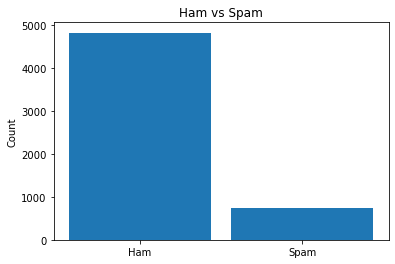

In [60]:
#Read in emailSpamCollection
df = pd.read_csv('sh_500.csv')
#Dataframe does not have colum labels - add them
df.columns = ['Label','email']

#Pre-process and clean up dataset by removing trailing white spaces, converting to lower case etc.
#it also puts each email text into a list of words that is stored in the email column of the dataframe
#this is the code you'll need when you read in the test data
email_data_clean = df.copy()
email_data_clean['email'] = email_data_clean['email'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
email_data_clean['email'] = email_data_clean['email'].str.lower()
email_data_clean['email'] = email_data_clean['email'].str.split()
le = preprocessing.LabelEncoder()

#change label from ham/spam to 0/1
email_data_clean['Label'] = le.fit_transform(email_data_clean['Label'])

#get nparray of all words in email
np_sms = email_data_clean.iloc[:,1].values
#store them in vocabulary 
vocabulary = list(set(np_sms.sum()))
#these are all the words in the dataset

#create new dataframe with each word as a feature and the # of times the word occurs as value
df_voc = pd.DataFrame([
    [row.count(word) for word in vocabulary]
    for row in email_data_clean.iloc[:,1].values], columns=vocabulary)
 
#use this as your training data
df_voc_train = df_voc.copy()

#Add the label back to the dataframe
#Use this dataframe if you need the label to create charts
df_voc['Label'] = email_data_clean.loc[:,'Label']

#spamcounts = email_data_clean["Label"].value_counts()
plt.bar(x=[0,0.4], height = spamcounts, width=0.35)
plt.xticks([0,0.4], ("Ham", "Spam"))
plt.ylabel("Count")
plt.title("Ham vs Spam")
plt.show()
###This looks similar to the training data

In [82]:
# bern_pred = cv_pred = cross_val_predict(bernoulli, df_voc_train, df_voc['Label'], cv=5)
# mult_pred = cv_pred = cross_val_predict(multinomial, df_voc_train, df_voc['Label'], cv=5)
# dt_pred = cv_pred = cross_val_predict(decisionTree, df_voc_train, df_voc['Label'], cv=5)
# ptron_pred = cv_pred = cross_val_predict(perceptron, df_voc_train, df_voc['Label'], cv=5)
# rf_pred = cv_pred = cross_val_predict(randomForest, df_voc_train, df_voc['Label'], cv=5)

bern_pred = bernoulli.predict(df_voc_train)
accuracy = accuracy_score(bern_pred,df_voc['Label'])
precision = precision_score(bern_pred,df_voc['Label'])
recall = recall_score(bern_pred,df_voc['Label'])
print("Bernoulli:\nccr =",accuracy,"\nprecision =",precision,"\nrecall =", recall)

mult_pred = multinomial.predict(df_voc_train)
accuracy = accuracy_score(mult_pred,df_voc['Label'])
precision = precision_score(mult_pred,df_voc['Label'])
recall = recall_score(mult_pred,df_voc['Label'])
print("\n\nMultinomial:\nccr =",accuracy,"\nprecision =",precision,"\nrecall =", recall)

dt_pred = decisionTree.predict(df_voc_train)
accuracy = accuracy_score(dt_pred,df_voc['Label'])
precision = precision_score(dt_pred,df_voc['Label'])
recall = recall_score(dt_pred,df_voc['Label'])
print("\n\nDecision Tree:\nccr =",accuracy,"\nprecision =",precision,"\nrecall =", recall)

ptron_pred = perceptron.predict(df_voc_train)
accuracy = accuracy_score(ptron_pred,df_voc['Label'])
precision = precision_score(ptron_pred,df_voc['Label'])
recall = recall_score(ptron_pred,df_voc['Label'])
print("\n\nPerceptron:\nccr =",accuracy,"\nprecision =",precision,"\nrecall =", recall)

rf_pred = randomForest.predict(df_voc_train)
accuracy = accuracy_score(rf_pred,df_voc['Label'])
precision = precision_score(rf_pred,df_voc['Label'])
recall = recall_score(rf_pred,df_voc['Label'])
print("\n\nRandom Forest:\nccr =",accuracy,"\nprecision =",precision,"\nrecall =", recall)

Bernoulli:
ccr = 0.8483033932135728 
precision = 0.5099337748344371 
recall = 0.9746835443037974


Multinomial:
ccr = 0.9900199600798403 
precision = 0.9735099337748344 
recall = 0.9932432432432432


Decision Tree:
ccr = 1.0 
precision = 1.0 
recall = 1.0


Perceptron:
ccr = 1.0 
precision = 1.0 
recall = 1.0


Random Forest:
ccr = 1.0 
precision = 1.0 
recall = 1.0


### It seems like the classifiers performed well on the sample data. I went back and re-trained the classifiers on the entirety of the SpamCollection file to try to get a better fit.

### Honestly I'm not sure they should have done this well, it feels like I shouldn't have been able to get a CCR, Precision, and Recall of 1.0 on 3 of the classifiers. Either I did something right or I did something very wrong. 